# RecipeSnap - a lightweight image to recipe model

In [8]:
from HydraNet import *
import torch
model = Hydra()
torch.hub.load_state_dict_from_url('https://drive.google.com/file/d/1FwCX-R80O9kfnkAx5fKD0nJufXpCT_P3/view?usp=share_link')

C:\Users\kevin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\kevin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


UnpicklingError: invalid load key, '<'.

In [1]:
from recipe_snap import *
from HydraNet import * 
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import shutil
from tqdm import tqdm


# image resizing for display
tfs = transforms.Compose([transforms.Resize(256), transforms.CenterCrop(256)])

ModuleNotFoundError: No module named 'torch'

Load RecipeSnap class

In [2]:
def plot_image(image_path):
    img = tfs(Image.open(image_path).convert("RGB"))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

def print_recipe(recipe, rank):
    print(f"\nRecipe likelihood rank: {rank}")
    print(f"Title: {recipe['title']}")
    print("Ingredient: ")
    print("\t" + "\n \t".join(recipe['ingredients']))
    print("Instruction: ")
    print("\t" + "\n \t".join(recipe['instructions']))

In [3]:
# Update with your paths and model names, the following are default values
image_dir = r'../images'
checkpoint_dir = r"../checkpoints/model"
recipe_emb_path = r"../data/recipe_embeddings/recipe_embeddings_feats_test.pkl" 
recipe_dict_path = r"../data/recipe_dict/test.pkl"
hydra_weights_path = r"/datasets/data5/recipe_snap/RecipeSnap-a-lightweight-image-to-recipe-model-master/Calories Estimation/best_model.pt"

In [4]:
rs = RecipeSnap(checkpoint_dir=checkpoint_dir)
rs.load_image_encoder()
rs.load_recipe_lib(recipe_emb_path = recipe_emb_path, recipe_dict_path = recipe_dict_path)
#model = Hydra()
#model.load_state_dict(torch.load(hydra_weights_path))

c:\Users\kevin\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\kevin\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
c:\Users\kevin\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Using cache found in C:\Users\kevin/.cache\torch\hub\intel-isl_MiDaS_master


Loading weights:  None


Using cache found in C:\Users\kevin/.cache\torch\hub\rwightman_gen-efficientnet-pytorch_master
Using cache found in C:\Users\kevin/.cache\torch\hub\intel-isl_MiDaS_master


Loading checkpoint from ... ../checkpoints/model
Loading checkpoint succeed.
image encoder 3535616
recipe_embs [[ 0.97239685  0.9999553  -0.9997202  ...  0.98708016 -0.6975954
  -0.6635583 ]
 [-0.71901464  0.06093328 -0.6305163  ...  0.3851063   0.01549883
  -0.49568406]]
recipe_ids ['fffe7168df', 'ffff89d1ae']
Succeed to load recipe embedding from ... ../data/recipe_embeddings/recipe_embeddings_feats_test.pkl
Recipe embedding (that is a list of vectors) shape: (102741, 1024)
Recipe ids (that is a list) length: 102741

-------------------------------------------------------
Length of recipe dictionary of dish with images: 51304

-------------------------------------------------------
Succeed to load recipe library from ... ../data/recipe_dict/test.pkl
Recipe library size with dish without images 154045 recipe library contents: 
('ffff89d1ae', {'ingredients': ['7 1/2 cups sugar', '3/4 cup lard', '9 eggs', '3 (8 ounce) cans evaporated milk', '3 (8 ounce) cans water', '1/8 cups flour', '1

In [7]:
results = rs.predict_dashboard(image=image_dir)

for img, recipes in results[2].items():
    plot_image(os.path.join(image_dir, img))
    # print(f"Image {img}")
    for i, recipe in enumerate(recipes):
        print_recipe(recipe, i)

TypeError: expected np.ndarray (got str)

### Add new recipe to recipe library

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
new_recipes = [{"title":"Pan-Fried Chinese Pancakes",
                    "ingredients":["1/4 teaspoon salt", "3/4 cup warm water"], 
                    "instructions":["Dissolve salt in warm water, and mix in 1 cup of flour to make a soft dough. Turn the dough out onto a well-floured work surface, and knead until slightly springy, about 5 minutes. If the dough is sticky, knead in 1/4 teaspoon of vegetable oil. Divide the dough into 8 equal-size pieces, and keep the pieces covered with a cloth",
                    "In a bowl, mix 1/4 cup of flour with 1 tablespoon vegetable oil to make a mixture like fine crumbs."]}
                    ]

In [6]:
rs.load_recipe_encoder()
rs.update_recipe_lib(new_recipes = new_recipes)

Loading recipe encoder ...
Loading recipe encoder succeed.
recipe encoder 41572864
Updating recipe lib ...
Before update, there are 154045 recipes in library
{'3da27821bd4257f1f8571d095072db0e': {'title': 'pan-fried chinese pancakes', 'ingredients': ['1/4 teaspoon salt', '3/4 cup warm water'], 'instructions': ['dissolve salt in warm water, and mix in 1 cup of flour to make a soft dough. turn the dough out onto a well-floured work surface, and knead until slightly springy, about 5 minutes. if the dough is sticky, knead in 1/4 teaspoon of vegetable oil. divide the dough into 8 equal-size pieces, and keep the pieces covered with a cloth', 'in a bowl, mix 1/4 cup of flour with 1 tablespoon vegetable oil to make a mixture like fine crumbs.']}}
1 recipe loaded
After update, there are 154046 recipes in library


In [12]:
rs.save_recipe_lib(new_recipe_emb_path="../data/recipe_embeddings/new_recipe_embeddings.pkl",
                new_recipe_dict_path="../data/recipe_dict/new_recipe.pkl")

# Predict my instafood eheh

In [19]:
results[3]['1664527212249.jpg'][1][0]

array([11.017695], dtype=float32)

In [ ]:
image_torch =  torch.from_numpy(image).float().permute(2,0,1)
                image_processed = self.preprocess_recipe(image_torch)[np.newaxis,:,:,:]
                emb = self.image_encoder(image_processed)
                emb = np.vstack([emb.cpu().detach().numpy()])
                print('emb shape', emb.shape, 'recipe embs shape', self.recipe_embs.shape)
                dists = pairwise_distances(emb, self.recipe_embs, metric='cosine') 
                print('dists shape', dists.shape)
                retrieved_idxs_recs = np.argpartition(dists, range(max_k), axis=-1)[:,:max_k] 
                print(retrieved_idxs_recs[0][0])
                retrieved_recipes_dict = defaultdict(list)  # è un dizionario flessible, se chiamo un elemento che non c'è lo crea (come lista qua)
                retrieved_recipes_dict['ricetta'].append(self.recipe_dict[self.recipe_ids[retrieved_idxs_recs[0][0]]])

In [5]:
my_dir = r'C:\Users\kevin\Desktop\Università\DataScience\Stage\RecipeSnap-a-lightweight-image-to-recipe-model-master\data\my_images\test'
results = rs.predict(image_dir=my_dir)

for img, recipes in results[2].items():
    plot_image(os.path.join(my_dir, img))
    print('CALORIES: ', results[3]['1664527212249.jpg'][0][0][0])
    print('CARBS: ', results[3]['1664527212249.jpg'][1][0][0])
    print('PROTEIN: ', results[3]['1664527212249.jpg'][2][0][0])
    print('FAT: ', results[3]['1664527212249.jpg'][3][0][0])
    print('MASS: ', results[3]['1664527212249.jpg'][4][0][0])
    
    for i, recipe in enumerate(recipes):
        print_recipe(recipe, i)

1 image loaded


RuntimeError: Given groups=1, weight of size [32, 4, 3, 3], expected input[1, 3, 512, 512] to have 4 channels, but got 3 channels instead

In [2]:
my_dir = r'C:\Users\kevin\Desktop\Università\Data Science\Stage\RecipeSnap-a-lightweight-image-to-recipe-model-master\RecipeSnap-a-lightweight-image-to-recipe-model-master\data\my_images\predictions'

for dish in os.listdir(my_dir):
    results = rs.predict(image_dir=my_dir + fr"\{dish}")
    for img, recipes in results[2].items():
        plot_image(os.path.join(my_dir + fr"\{dish}", img))
        # print(f"Image {img}")
        for i, recipe in enumerate(recipes):
            print_recipe(recipe, i)

FileNotFoundError: [WinError 3] Impossibile trovare il percorso specificato: 'C:\\Users\\kevin\\Desktop\\Università\\Data Science\\Stage\\RecipeSnap-a-lightweight-image-to-recipe-model-master\\RecipeSnap-a-lightweight-image-to-recipe-model-master\\data\\my_images\\predictions'

In [37]:
len(results[0][0]) +len(results[0][1]) +len(results[0][2]) +len(results[0][3]) 

4096

## Nutrition5k data

In [2]:
# read txt file
with open(r'C:\Users\kevin\Desktop\Università\Data Science\Stage\RecipeSnap-a-lightweight-image-to-recipe-model-master\RecipeSnap-a-lightweight-image-to-recipe-model-master\Nutrition5k data\dish_metadata_cafe1.csv', 'r') as f:
    data1 = f.read()

with open(r'C:\Users\kevin\Desktop\Università\Data Science\Stage\RecipeSnap-a-lightweight-image-to-recipe-model-master\RecipeSnap-a-lightweight-image-to-recipe-model-master\Nutrition5k data\dish_metadata_cafe2.csv', 'r') as f:
    data2 = f.read()

In [3]:
import pandas as pd
nutrition1 = pd.DataFrame({})
nutrition1['ingredients'] = ''
for idx, dish in enumerate(data2.split('\n')[:-1]):
    lista = dish.split(',')
    # concat row in df
    nutrition1 = pd.concat([nutrition1, pd.DataFrame([lista[0:6]])], axis=0, ignore_index = True)
    diz  = {}
    for idx2, ingredient in enumerate(lista[6:]):
        if ingredient[0:4] == 'ingr':
            diz[ingredient] = lista[6:][idx2+1:idx2+7]
        else:
            pass
    # add diz to df
    nutrition1['ingredients'][idx] = diz
nutrition1.tail()

ingredients                0  \
233  {'ingr_0000000002': ['strawberries', '232.0000...  dish_1571934465   
234  {'ingr_0000000027': ['broccoli', '14.352157', ...  dish_1573073666   
235  {'ingr_0000000074': ['pasta', '103.000000', '1...  dish_1575924356   
236  {'ingr_0000000008': ['scrambled eggs', '111.00...  dish_1574359199   
237  {'ingr_0000000016': ['brussels sprouts', '76.3...  dish_1576171157   

            1           2         3         4         5  
233  0.000000  232.000000  0.000000  0.000000  0.000000  
234  0.000000   15.000000  0.000000  0.000000  0.000000  
235  0.000000  103.000000  0.000000  0.000000  0.000000  
236  0.000000  329.000000  0.000000  0.000000  0.000000  
237  0.000000  132.000000  0.000000  0.000000  0.000000

In [4]:
nutrition2 = pd.DataFrame({})
nutrition2['ingredients'] = ''
for idx, dish in enumerate(data1.split('\n')[:-1]):   # ultima riga è vuota
    lista = dish.split(',')
    # concat row in df: dish_id, total_calories, total_mass, total_fat, total_carb, total_protein
    nutrition2 = pd.concat([nutrition2, pd.DataFrame([lista[0:6]])], axis=0, ignore_index = True)
    diz  = {}
    for idx2, ingredient in enumerate(lista[6:]):
        if ingredient[0:4] == 'ingr':
            diz[ingredient] = lista[6:][idx2+1:idx2+7]
        else:
            pass
    # add diz to df: (ingr_1_id, ingr_1_name, ingr_1_grams, ingr_1_calories, ingr_1_fat, ingr_1_carb, ingr_1_protein
    nutrition2['ingredients'][idx] = diz
nutrition2.head()

ingredients                0  \
0  {'ingr_0000000508': ['soy sauce', '3.398568', ...  dish_1561662216   
1  {'ingr_0000000433': ['roasted potatoes', '17.0...  dish_1562688426   
2  {'ingr_0000000312': ['pepper', '0.300716', '0....  dish_1561662054   
3  {'ingr_0000000448': ['jalapenos', '0.192961', ...  dish_1562008979   
4  {'ingr_0000000471': ['cherry tomatoes', '55.00...  dish_1560455030   

            1           2          3          4          5  
0  300.794281  193.000000  12.387489  28.218290  18.633970  
1  137.569992   88.000000   8.256000   5.190000  10.297000  
2  419.438782  292.000000  23.838249  26.351543  25.910593  
3  382.936646  290.000000  22.224644  10.173570  35.345387  
4   20.590000  103.000000   0.148000   4.625000   0.956000

In [5]:
# concat nutrition1 and nutrition2
nutrition = pd.concat([nutrition1, nutrition2], axis=0, ignore_index = True)
# rename the first 6 columns
nutrition.columns = ['ingredients','dish_id', 'total_calories', 'total_mass', 'total_fat', 'total_carb', 'total_protein']
nutrition.tail()

ingredients          dish_id  \
5001  {'ingr_0000000038': ['pineapple', '63.000000',...  dish_1551139192   
5002  {'ingr_0000000008': ['scrambled eggs', '123.00...  dish_1563382911   
5003  {'ingr_0000000543': ['chia seeds', '9.725404',...  dish_1562691737   
5004  {'ingr_0000000440': ['grapes', '77.000000', '5...  dish_1558458496   
5005  {'ingr_0000000032': ['tomatoes', '3.921569', '...  dish_1568664931   

     total_calories  total_mass  total_fat total_carb total_protein  
5001      31.500000   63.000000   0.063000   8.190000      0.315000  
5002     182.040009  123.000000  13.530000   1.968000     12.300000  
5003     485.676880  700.000000  11.722251  70.597321     27.926394  
5004      53.130001   77.000000   0.154000  13.860001      0.539000  
5005      67.877647   60.000000   6.474706   2.107843      1.279608

In [6]:
# convert to int from second column to the end
nutrition.iloc[:, 2:] = nutrition.iloc[:, 2:].astype(float).astype(int)
nutrition.dtypes

ingredients       object
dish_id           object
total_calories     int32
total_mass         int32
total_fat          int32
total_carb         int32
total_protein      int32
dtype: object

9

### Statistiche descrittive

In [7]:
# ci sono dish con id duplicati?
len(nutrition['dish_id'].unique())

5006

In [18]:
# let see the dtypes
nutrition.dtypes

ingredients       object
dish_id           object
total_calories    object
total_mass        object
total_fat         object
total_carb        object
total_protein     object
dtype: object

In [ ]:
# convert to int from second column to the end
nutrition.iloc[:, 1:-1] = nutrition.iloc[:, 1:-1].astype(float).astype(int)
nutrition.dtypes


In [ ]:
# plot the distribution of calories
import matplotlib.pyplot as plt
plt.hist(nutrition['total_calories'], bins=100)
plt.show()

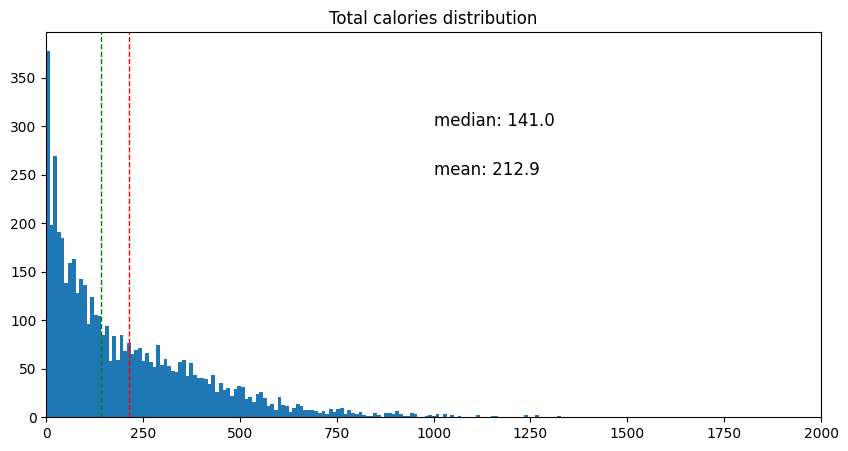

In [16]:
# plot the total calories distribution
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
plt.hist(nutrition['total_calories'], bins=1000)
# resize the x axis
plt.xlim(0, 2000)
# plot the mean
plt.axvline(nutrition['total_calories'].mean(), color='red', linestyle='dashed', linewidth=1)
# plot the median
plt.axvline(nutrition['total_calories'].median(), color='green', linestyle='dashed', linewidth=1)
# add numbers to the plot
plt.text(1000, 250, f"mean: {round(nutrition['total_calories'].mean(), 1)}", fontsize=12)
plt.text(1000, 300, f"median: {round(nutrition['total_calories'].median(),1)}", fontsize=12)
plt.title('Total calories distribution')
plt.show()

#### mmmmmh something's strange

dish_id  total_calories  total_mass  total_fat  total_carb  \
119  dish_1576258657               0         168          0           0   

     total_protein                                        ingredients  
119              0  {'ingr_0000000004': ['bacon', '35.000000', '18...

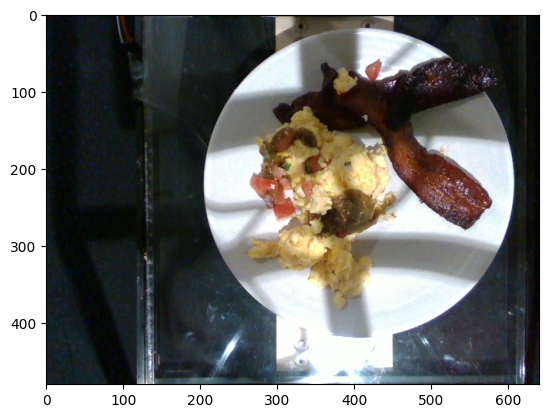

In [17]:
# visualize an image from directory
import matplotlib.image as mpimg
img = mpimg.imread(r'C:\Users\kevin\Desktop\Università\Data Science\Stage\RecipeSnap-a-lightweight-image-to-recipe-model-master\RecipeSnap-a-lightweight-image-to-recipe-model-master\Nutrition5k data\realsense_overhead\dish_1576258657\rgb.png')
plt.imshow(img)
nutrition[nutrition['dish_id'] == 'dish_1576258657'] 

In [13]:
#{ingr_1_id: [ingr_1_name, ingr_1_grams, ingr_1_calories, ingr_1_fat, ingr_1_carb, ingr_1_protein]}
# in questo caso ci sono 35 gr di bacon, 110gr di uova, 22gr di salsa
# 35gr di bacon hanno 189kcal, 110gr di uova hanno 164kcal, 22gr di salsa hanno 6kcal = 359kcal
# tuttavia non sono presenti gli apporti nutrizionali del piatto finale in questo piatto
nutrition[nutrition['dish_id'] == 'dish_1576258657']['ingredients'].values[0]

IndexError: index 0 is out of bounds for axis 0 with size 0

#### ok, some dishes do not have total macros, but it's still possible to get them
#### I could estimate how many dishes are in this situation, but vegetables could annoy the stats
#### now let's see if all the dishes have rgb images ... some of them have only video recordings.

In [ ]:
numero_di_piatti = nutrition.shape[0]
for idx, piatto in enumerate(nutrition['dish_id']):
    try:
        img = tfs(Image.open(fr'C:\Users\kevin\Desktop\Università\Data Science\Stage\RecipeSnap-a-lightweight-image-to-recipe-model-master\RecipeSnap-a-lightweight-image-to-recipe-model-master\Nutrition5k data\realsense_overhead\{piatto}\rgb.png').convert("RGB"))
        plt.imshow(img)
        numero_di_piatti -= 1
    except:
        pass
numero_di_piatti # = 1516 piatti che non hanno associate foto (circa il 30%)
                 # Furthermore, 3.5k out of the 5k dishes also include overhead RGB-D images captured from an Intel RealSense camera.

# Test for Nutrition5k dataset

In [1]:
# Update with your paths and model names, the following are default values
image_dir = r'../images'
checkpoint_dir = r"../checkpoints/model"
recipe_emb_path = r"../data/recipe_embeddings/recipe_embeddings_feats_test.pkl" 
recipe_dict_path = r"../data/recipe_dict/test.pkl"

In [17]:
to_embed = r"C:\Users\kevin\Desktop\Università\Data Science\Stage\RecipeSnap-a-lightweight-image-to-recipe-model-master\RecipeSnap-a-lightweight-image-to-recipe-model-master\Nutrition5k data\test nutrition 5k\test"

In [ ]:
from recipe_snap import * 
#rs = RecipeSnap(checkpoint_dir=checkpoint_dir)
#rs.load_image_encoder()
#rs.load_recipe_lib(recipe_emb_path=recipe_emb_path, recipe_dict_path=recipe_dict_path)
lista_chiavi = os.listdir(to_embed)
rs.TEST_update_recipe_lib(image_dir = to_embed , key_list = os.listdir(to_embed), nutrition=nutrition)

In [8]:
to_retrieve = r"C:\Users\kevin\Desktop\Università\Data Science\Stage\RecipeSnap-a-lightweight-image-to-recipe-model-master\RecipeSnap-a-lightweight-image-to-recipe-model-master\data\my_images\test nutrition 5k\to retrieve"
results = rs.TEST_predict(image_dir = to_retrieve)

50 image loaded


In [9]:
# iterate over dict
import pandas as pd
df = pd.DataFrame({})
retrieved = []
hue = []
i=0
for key, value in results[2].items():
    try:   # se non è un dizionario    
        if (value[0].endswith(".jpeg")) and (value[0][0:2] == key[0:2]):
            #print("RETRIEVED.     " ,"KEY: ", key, "VALUE: ", value[0], "LEN: ", len(value[0]))
            retrieved.append(1)
            hue.append('retreived')
            
        if (value[0].endswith(".jpeg")) and (value[0][0:2] != key[0:2]):
            #print("CONFUSED.     " ,"KEY: ", key, "VALUE: ", value[0], "LEN: ", len(value[0]))
            retrieved.append(0)
            hue.append('not retreived (confused)')
    except:
            retrieved.append(0)
            hue.append('not retreived (not in embed folder')    
            #print("NOT RETRIEVED.     " ,"KEY: ", key, "VALUE: ", value)
df['retrieved'] = retrieved
df['hue'] = hue
df

retrieved                                 hue
0           0            not retreived (confused)
1           1                           retreived
2           1                           retreived
3           1                           retreived
4           0  not retreived (not in embed folder
5           0            not retreived (confused)
6           0            not retreived (confused)
7           0            not retreived (confused)
8           1                           retreived
9           0            not retreived (confused)
10          1                           retreived
11          1                           retreived
12          1                           retreived
13          1                           retreived
14          0            not retreived (confused)
15          1                           retreived
16          1                           retreived
17          0            not retreived (confused)
18          1                           retreived
19          1                           retreived
20          1                           retreived
21          0            not retreived (confused)
22          0            not retreived (confused)
23          0            not retreived (confused)
24          0            not retreived (confused)
25          0            not retreived (confused)
26          0            not retreived (confused)
27          1                           retreived
28          1                           retreived
29          1                           retreived
30          1                           retreived
31          1                           retreived
32          0  not retreived (not in embed folder
33          1                           retreived
34          1                           retreived
35          0            not retreived (confused)
36          0            not retreived (confused)
37          1                           retreived
38          1                           retreived
39          1                           retreived
40          1                           retreived
41          1                           retreived
42          0            not retreived (confused)
43          1                           retreived
44          1                           retreived
45          1                           retreived
46          1                           retreived
47          1                           retreived
48          0            not retreived (confused)
49          0  not retreived (not in embed folder

Text(0.5, 1.0, 'Retrieved vs not retrieved')

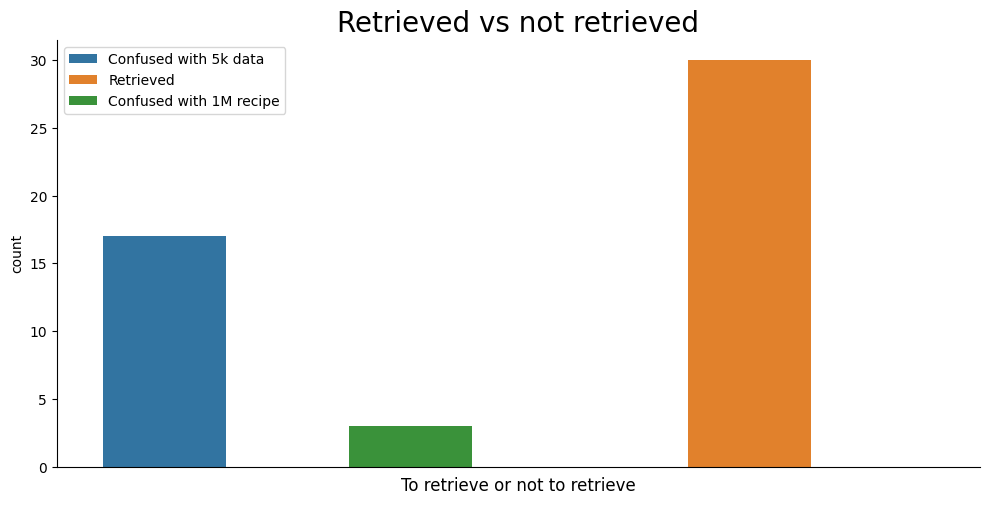

In [10]:
# make a plot with retrieved and hue columns for df
import seaborn as sns
sns.catplot(x='retrieved', hue='hue', data=df, kind='count', height=5, aspect=2, legend = False)

# change legend labels
import matplotlib.pyplot as plt
plt.legend(labels=['Confused with 5k data', 'Retrieved', 'Confused with 1M recipe'])

# change x label
plt.xlabel('To retrieve or not to retrieve', fontsize=12)

# remove x ticks
plt.xticks([])

# change title
plt.title('Retrieved vs not retrieved', fontsize=20)

# Update the recipe library with image embedding (img_emb : kcal)
### scarico tutti i video con gsutil, estraggo ogni 50 frames un immagine, prendo la prima da caricare in libreria e l'ultima per il test di retrieval.

In [22]:
# prima di tutto devo trovare tutti i piatti che hanno una foto RGB associata
side_angles = r"E:\Stage\side_angles"
dishes = os.listdir(side_angles)
os.makedirs(r"..\Nutrition5k data\test nutrition 5k" + r"\\" + "embedding_images(stacking)", exist_ok=True)
os.makedirs(r"..\Nutrition5k data\test nutrition 5k" + r"\\" + "retrieval_images(stacking)", exist_ok=True)
problems_embs = []
problems_retrieval = []

for idx, dish in enumerate(dishes[:-1]):

    # Embedding image
    frame_emb = os.listdir(fr"E:\Stage\side_angles\{dish}\frames_sampled50")[0]
    dish_path = fr"E:\Stage\side_angles\{dish}\frames_sampled50\{frame_emb}"
    new_dish_path = fr"..\Nutrition5k data\test nutrition 5k" + r"\\" + "embedding_images"
    try:
        shutil.copy(dish_path, new_dish_path) 
        os.rename(new_dish_path + r"\\" + frame_emb, new_dish_path + r"\\" + fr"{dish}.jpeg")
    except:
        problems_embs.append(dish)
    
    # Retrieval image
    frame_ret = os.listdir(fr"E:\Stage\side_angles\{dish}\frames_sampled50")[-1]
    dish_path = fr"E:\Stage\side_angles\{dish}\frames_sampled50\{frame_ret}"
    new_dish_path = fr"..\Nutrition5k data\test nutrition 5k" + r"\\" + "retrieval_images"
    try:
        shutil.copy(dish_path, new_dish_path)  
        os.rename(new_dish_path + r"\\" + frame_ret, new_dish_path + r"\\" + fr"{dish}.jpeg")
    except:
        problems_retrieval.append(dish)

In [25]:
len(problems_embs)

0

### Qui creo la cartella per i miei stack embeddings: mediamente prendo il primo frame per ogni video e uso l'ultimo frame dell'ultimo video per il retrieve, ma potrebbe variare leggermente.

In [ ]:
side_angles = r"E:\Stage\side_angles"
dishes = os.listdir(side_angles)
os.makedirs(r"..\Nutrition5k data\test nutrition 5k" + r"\\" + "embedding_images(stacking)", exist_ok=True)
os.makedirs(r"..\Nutrition5k data\test nutrition 5k" + r"\\" + "retrieval_images(stacking)", exist_ok=True)

for idx, dish in enumerate(dishes[:-1]):

    # Embedding image
    frame_emb = os.listdir(fr"E:\Stage\side_angles\{dish}\frames_sampled50")
    retrieval_list = frame_emb
    # sort the list of frames
    frame_emb.sort()
    retrieval_list.sort()
    
    os.makedirs(fr"..\Nutrition5k data\test nutrition 5k\embedding_images(stacking)\{dish}", exist_ok=True)

    for i in range(0, len(frame_emb), 2):
        try:
            current_image = fr"E:\Stage\side_angles\{dish}\frames_sampled50\{frame_emb[i]}"
            future_location = fr"..\Nutrition5k data\test nutrition 5k\embedding_images(stacking)\{dish}"
            #print(frame_emb[i])
            
            # pop frame_emb[i] from the list
            retrieval_list.remove(frame_emb[i])
            shutil.copy(current_image, future_location)

        except Exception as e:
            #print(e)
            break
    
    # Retrieval image
    ret_frame = retrieval_list[-1]
    #print(ret_frame)
    ret_location = fr"E:\Stage\side_angles\{dish}\frames_sampled50\{ret_frame}"
    ret_destination_folder = fr"..\Nutrition5k data\test nutrition 5k\retrieval_images(stacking)"
    shutil.copy(ret_location, ret_destination_folder)
    os.rename(ret_destination_folder + r"\\" + ret_frame, ret_destination_folder + r"\\" + fr"{dish}.jpeg")
    #print('--------------------------------')
    

In [12]:
os.path.join(fr"..\Nutrition5k data\test nutrition 5k\retrieval_images(stacking)", "ciao")

'..\\Nutrition5k data\\test nutrition 5k\\retrieval_images(stacking)\\ciao'

### Update recipe library with Nutrition5k dataset

In [92]:
from recipe_snap import * 

frames = r"..\Nutrition5k data\test nutrition 5k" + r"\\" + "embedding_images(stacking)"
checkpoint_dir = r"../checkpoints/model"
recipe_emb_path = r"../data/recipe_embeddings/recipe_embeddings_feats_test.pkl"   # questa rimane invariata durante questo aggiornamento
recipe_dict_path = r"../data/recipe_dict/test.pkl"                                # questa pure

rs = RecipeSnap(checkpoint_dir=checkpoint_dir)
rs.load_image_encoder()
rs.load_recipe_lib(recipe_emb_path=recipe_emb_path, recipe_dict_path = recipe_dict_path)
key_list = []
kcal_dict = {}
for idx, image_directory in enumerate(os.listdir(frames)):
    kcal_info = nutrition[nutrition['dish_id'] == image_directory]['ingredients'].values[0]
    kcal_dict[image_directory] = kcal_info
    key_list.append(image_directory)

    
#rs.TEST_STACK_update_recipe_lib(image_dir = frames, key_list = key_list, nutrition = kcal_dict)  # aggiorno il dizionario
#rs.save_recipe_lib(new_recipe_emb_path="../data/recipe_embeddings/new_recipe_embeddings.pkl",
                        #new_recipe_dict_path="../data/recipe_dict/new_recipe.pkl")
    
#new_recipe_emb_path = r"../data/recipe_embeddings/new_recipe_embeddings.pkl"   # questa rimane invariata durante questo aggiornamento
#new_recipe_dict_path = r"../data/recipe_dict/new_recipe.pkl"
#rs.load_recipe_lib(recipe_emb_path=recipe_emb_path, recipe_dict_path = recipe_dict_path)


c:\Users\kevin\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\kevin\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Loading checkpoint from ... ../checkpoints/model
Loading checkpoint succeed.
image encoder 3535616
recipe_embs [[ 0.97239685  0.9999553  -0.9997202  ...  0.98708016 -0.6975954
  -0.6635583 ]
 [-0.71901464  0.06093328 -0.6305163  ...  0.3851063   0.01549883
  -0.49568406]]
recipe_ids ['fffe7168df', 'ffff89d1ae']
Succeed to load recipe embedding from ... ../data/recipe_embeddings/recipe_embeddings_feats_test.pkl
Recipe embedding (that is a list of vectors) shape: (102741, 1024)
Recipe ids (that is a list) length: 102741

-------------------------------------------------------
Length of recipe dictionary of dish with images: 51304

-------------------------------------------------------
Succeed to load recipe library from ... ../data/recipe_dict/test.pkl
Recipe library size with dish without images 154045 recipe library contents: 
('ffff89d1ae', {'ingredients': ['7 1/2 cups sugar', '3/4 cup lard', '9 eggs', '3 (8 ounce) cans evaporated milk', '3 (8 ounce) cans water', '1/8 cups flour', '1

In [21]:
nutrition[nutrition['dish_id'] == "dish_1550704750"]['ingredients']

Series([], Name: ingredients, dtype: object)

In [12]:
from recipe_snap import * 
frames = r"..\Nutrition5k data\test nutrition 5k" + r"\\" + "retrieval_images(stacking)"
results = rs.TEST_predict(image_dir = frames, key_list = key_list, max_k = 10)

4793 image loaded


## How it works
### La funzione predict mi confronta tutte le immagini di test con ognuna delle immagini presenti nella libreria, restituendomi quindi 5 delle immagini più simili. Per quelle di nutrition5k, ad ogni immagine della libreria è associato il dizionario delle calorie, quindi se ritrovo lo stesso dizionario in unodei 5 retrieve, allora ho trovato la ricetta che mi interessa. 

In [112]:
def key_values_list(dict):
    key_l = []
    for key in dict.keys():
        key_l.append(key)

    value_list = list(dict.values())[0][1:]
    return key_l, np.array([value_list]).astype(np.float64)

def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(set(list1)) + len(set(list2))) - intersection
    return float(intersection) / union


top_10 = 0
top_5 = 0
top_3 = 0
top_1 = 0
top1_similarity = []

# print first element of results[2] dict
for idx,dish in enumerate(key_list):
    ground_truth = nutrition[nutrition['dish_id'] == dish]['ingredients'].values[0]
    
    # top-k recall
    if ground_truth == results[2][dish][0]:
        top_1 += 1          
    if ground_truth in results[2][dish][0:3]:
        top_3 += 1
    if ground_truth in results[2][dish][0:5]:
        top_5 += 1    
    if ground_truth in results[2][dish][0:10]:
        top_10 += 1

    # top-1 similarity
    if len(results[2][dish][0]) == len(ground_truth):
        try:
            gr_k,gr_v = key_values_list(ground_truth)
            re_k,re_v = key_values_list(results[2][dish][0])
            dis_kcal = pairwise_distances(gr_v,re_v, metric = 'cosine')[0][0]
            dis_ingr = jaccard_similarity(gr_k,re_k)
            top1_similarity.append(np.mean([dis_ingr, dis_kcal]))
        except Exception as e:
            print(e)
            top1_similarity.append(0)

# plot top 5, top 3 and top 1
print("Accuracy top 1: ", round(top_1*100/len(key_list),2), "%")
print("Accuracy top 3: ", round(top_3*100/len(key_list),2), "%")
print("Accuracy top 5: ", round(top_5*100/len(key_list),2), "%")
print("Accuracy top 10: ", round(top_10*100/len(key_list),2), "%")

could not convert string to float: '8 oz brick mild cheddar cheese'
Accuracy top 1:  27.14 %
Accuracy top 3:  41.12 %
Accuracy top 5:  48.99 %
Accuracy top 10:  60.25 %


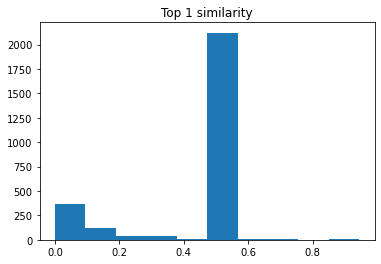

In [111]:
# plot histogram of top 1 similarity 
plt.hist(top1_similarity, bins = 10)
plt.title("Top 1 similarity")
plt.show()

In [102]:
np.mean(top1_similarity)

0.414634066779704

In [106]:
len(top1_similarity)

2731

# TensorFlow - Seefood segmentation

In [44]:
# For running inference on the TF-Hub module.
import tensorflow.compat.v2 as tf

import tensorflow_hub as hub

# For downloading the image.
import matplotlib.pyplot as plt
import tempfile
from six import BytesIO

# For drawing onto the image.
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

# For measuring the inference time.
import time

# Print Tensorflow version
print(tf.__version__)

# Check available GPU devices.
print("The following GPU devices are available: %s" % tf.test.gpu_device_name())

# Load the model
module = hub.load('https://tfhub.dev/google/seefood/segmenter/mobile_food_segmenter_V1/1').signatures['default']

2.10.0
The following GPU devices are available: 
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [45]:
def display_image(image):
  fig = plt.figure(figsize=(20, 15))
  plt.grid(False)
  # load image
  #image = plt.imread(image)    questo serve quando l'immagine è un path e non un array, poichè converte immagine in array
  plt.imshow(image)



def resize_and_normalize_image(image_data, new_width=513, new_height=513,
                              display=False):
  _, filename = tempfile.mkstemp(suffix=".jpg")
  pil_image = Image.open(image_data)
  
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)
  
  pil_image_rgb = pil_image.convert("RGB")
  pil_image_rgb.save(filename, format="JPEG", quality=90)

  img = tf.io.read_file(filename)
  img = tf.image.decode_jpeg(img, channels=3)

  # normalize pixel values to be between 0 and 1
  img_final = tf.cast(img, tf.float32) / 255.0
  print("Image downloaded to %s." % filename)

  if display:
    display_image(pil_image)

  return img_final[tf.newaxis, ...]    # add batch dimension





def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  # normalize pixel values to be between 0 and 1
  img_final = tf.cast(img, tf.float32) / 255.0

  return img_final

### inference on a single image

In [143]:
img_path = r"C:\Users\kevin\Desktop\dish_1566316612\rgb.png"

def run_detector(detector, path):
  img = resize_and_normalize_image(path)
  start_time = time.time()
  result = detector(img)
  end_time = time.time()

  result = {key:value.numpy() for key,value in result.items()}
  print("Inference time: ", end_time-start_time)

  return result


prediction = run_detector(module, img_path)

Image downloaded to C:\Users\kevin\AppData\Local\Temp\tmplyug5ibg.jpg.
Inference time:  0.42935872077941895


In [ ]:
# questi sono i nomi delle classi predette per ogni pixel
prediction['food_group_segmenter:semantic_predictions'][0][: , 512]  # prendo l'ultima colonna

In [48]:
import pandas as pd
labelmap = pd.read_csv(r'..\Calories Estimation\seefood_mobile_food_segmenter_V1_labelmap.csv')
labelmap.head()

id                                   name
0    0                             background
1    1              vegetables | leafy_greens
2    2           vegetables | stem_vegetables
3    3         vegetables | non-starchy_roots
4    4                     vegetables | other
5    5                                 fruits
6    6                         protein | meat
7    7                      protein | poultry
8    8                      protein | seafood
9    9                         protein | eggs
10  10                   protein | beans/nuts
11  11          starches/grains | baked_goods
12  12  starches/grains | rice/grains/cereals
13  13        starches/grains | noodles/pasta
14  14   starches/grains | starchy_vegetables
15  15                starches/grains | other
16  16                            soups/stews
17  17                           herbs/spices
18  18                                  dairy
19  19                                 snacks
20  20                        sweets/desserts
21  21                              beverages
22  22                       fats/oils/sauces
23  23                        food_containers
24  24                           dining_tools
25  25                             other_food

In [145]:
# instantiate a numpy array with the same shape of the image
# and fill it with the class names
class_names = np.full_like(prediction['food_group_segmenter:semantic_predictions'], 'Hi', dtype= "object")# map the class names to the predicted class ids

for i in range(len(prediction['food_group_segmenter:semantic_predictions'][0])):        # per ogni riga
    for j in range(len(prediction['food_group_segmenter:semantic_predictions'][0][i])): # per ogni colonna
        class_names[0][i][j] = labelmap['name'][prediction['food_group_segmenter:semantic_predictions'][0][i][j]]

In [147]:
N = 26
# define the colormaps
cmap = plt.cm.tab20b
cmap2 = plt.cm.tab20c

# convert cmap to list
cmaplist = [cmap(i)[0:3] for i in range(cmap.N)]
cmaplist2 = [cmap2(i)[0:3] for i in range(cmap2.N)]

In [148]:
color = []
color2 = []
for idx, tupla in enumerate(cmaplist):
    nuova_tupla = ()
    nuova_tupla2 = ()
    for idx2, elemento in enumerate(tupla):
        rgb = round(elemento*255)
        nuova_tupla = nuova_tupla + (rgb,)
        rgb2 = round(cmaplist2[idx][idx2]*255)
        nuova_tupla2 = nuova_tupla2 + (rgb2,)
    color.append(nuova_tupla)
    color2.append(nuova_tupla2)

In [149]:
from scipy.spatial import KDTree
from webcolors import (
    CSS3_HEX_TO_NAMES,
    hex_to_rgb,
)
def convert_rgb_to_names(rgb_tuple):
    
    # a dictionary of all the hex and their respective names in css3
    css3_db = CSS3_HEX_TO_NAMES
    names = []
    rgb_values = []
    for color_hex, color_name in css3_db.items():
        names.append(color_name)
        rgb_values.append(hex_to_rgb(color_hex))
    
    kdt_db = KDTree(rgb_values)
    distance, index = kdt_db.query(rgb_tuple)
    return names[index]

In [150]:
labelmap['color_names'] = ''
labelmap['color_rgb'] = ''
for i in range(len(color)):
    labelmap['color_names'][i] = convert_rgb_to_names(color[i])
    labelmap['color_rgb'][i] = color[i]
for i in range(6):
    labelmap['color_names'][20+i] = convert_rgb_to_names(color2[i])
    labelmap['color_rgb'][20+i] = color2[i]
labelmap

C:\Users\kevin\AppData\Local\Temp\ipykernel_19244\2912907935.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labelmap['color_names'][i] = convert_rgb_to_names(color[i])
C:\Users\kevin\AppData\Local\Temp\ipykernel_19244\2912907935.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labelmap['color_rgb'][i] = color[i]
C:\Users\kevin\AppData\Local\Temp\ipykernel_19244\2912907935.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labe

id                                   name     color_names        color_rgb
0    0                             background   darkslateblue    (57, 59, 121)
1    1              vegetables | leafy_greens   darkslateblue    (82, 84, 163)
2    2           vegetables | stem_vegetables       slateblue  (107, 110, 207)
3    3         vegetables | non-starchy_roots  lightsteelblue  (156, 158, 222)
4    4                     vegetables | other  darkolivegreen    (99, 121, 57)
5    5                                 fruits     yellowgreen   (140, 162, 82)
6    6                         protein | meat       darkkhaki  (181, 207, 107)
7    7                      protein | poultry   palegoldenrod  (206, 219, 156)
8    8                      protein | seafood          sienna   (140, 109, 49)
9    9                         protein | eggs            peru   (189, 158, 57)
10  10                   protein | beans/nuts      sandybrown   (231, 186, 82)
11  11          starches/grains | baked_goods       burlywood  (231, 203, 148)
12  12  starches/grains | rice/grains/cereals          sienna    (132, 60, 57)
13  13        starches/grains | noodles/pasta          sienna    (173, 73, 74)
14  14   starches/grains | starchy_vegetables       indianred   (214, 97, 107)
15  15                starches/grains | other      darksalmon  (231, 150, 156)
16  16                            soups/stews         dimgray   (123, 65, 115)
17  17                           herbs/spices   palevioletred   (165, 81, 148)
18  18                                  dairy          orchid  (206, 109, 189)
19  19                                 snacks            plum  (222, 158, 214)
20  20                        sweets/desserts       steelblue   (49, 130, 189)
21  21                              beverages  cornflowerblue  (107, 174, 214)
22  22                       fats/oils/sauces  lightsteelblue  (158, 202, 225)
23  23                        food_containers      powderblue  (198, 219, 239)
24  24                           dining_tools       orangered    (230, 85, 13)
25  25                             other_food           coral   (253, 141, 60)

In [34]:
class_names[0].shape #(513, 513)
class_names[0][0].shape  #(513,) vettore riga 
class_names[0][0][0]   # background

'background'

### converting labels to RGB color

## Qui passo dalla matrice di labels alla matrice mappata nei colori RGB

In [151]:
from PIL import Image

img = resize_and_normalize_image(r"C:\Users\kevin\Desktop\dish_1558468401\embedding_image\rgb.png")    # normalizzo l'immagine in 0 e 1 e la metto in 513x513
img_copy = np.full_like(img, fill_value=1)                                  # creo una matrice di 513x513x3 piena di 1, sulla quale lavoro
dict_classes = {} 
 
for idx, row in enumerate(class_names[0]):                                  # itero sulle righe della matrice delle classi predette
    for idx2, cell in enumerate(row):                                       # itero sulle celle della riga
        color_4 = labelmap['color_rgb'][labelmap['name'] == cell]           # prendo il colore della classe predetta
        color_4 = [el/255 for i, el in enumerate(color_4.iloc[0])]             
        color_3 = colors.to_rgb(color_4)                                    # lo converto in rgb a 3 canali (senza alpha)
        img_copy[0][idx][idx2] = color_3
        if cell not in dict_classes.keys():
            dict_classes[cell] = 1
        else:
            dict_classes[cell] += 1

Image downloaded to C:\Users\kevin\AppData\Local\Temp\tmpu45o9xd0.jpg.


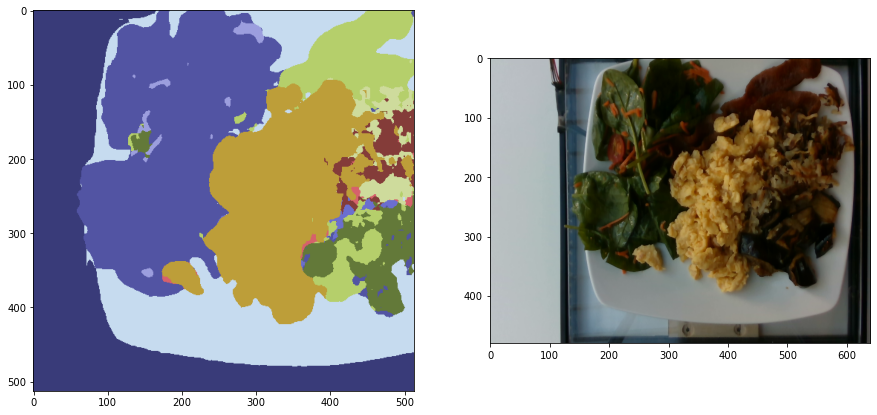

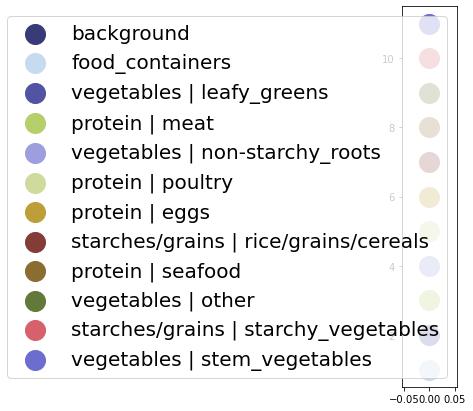

In [158]:
# plot 2 images in the same row
fig_seefood, ax_seefood = plt.subplots(1, 2, figsize=(15, 15))
ax_seefood[0].imshow(Image.fromarray(np.uint8(img_copy[0]*255)))
ax_seefood[1].imshow(img)

# plot the legend
fig, ax_seefood = plt.subplots(figsize=(1, 7))
for idx, key in enumerate(dict_classes.keys()):
    color=labelmap['color_rgb'][labelmap['name'] == key].iloc[0]
    color_rgb_scaled = [el/255 for i, el in enumerate(color)]
    ax_seefood.scatter(0, idx, color = color_rgb_scaled, label=key)
ax_seefood.legend(loc='center', bbox_to_anchor=(1.5, 0.5), ncol=1)
ax_seefood.legend()
# adjust legend size
plt.rcParams['legend.fontsize'] = 20
# adjust legend point size
plt.rcParams['lines.markersize'] = 20
plt.show()


### inferenced components distribution

<AxesSubplot:>

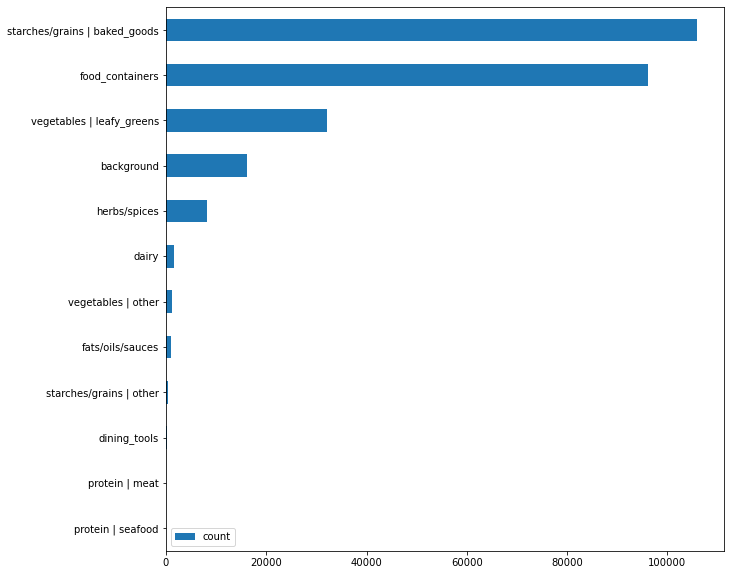

In [27]:
df = pd.DataFrame.from_dict(dict_classes, orient='index', columns=['count'])
df = df.sort_values(by=['count'], ascending=True)
# plot in horizontal bar chart, with different colors
df.plot(kind='barh', figsize=(10, 10))

# PyTorch Hub - Depth Raw Estimation

### Large model (7 secondi di inferenza)

In [ ]:
import cv2
import torch
import urllib.request
import matplotlib.pyplot as plt

large = "DPT_Large"     # MiDaS v3 - Large     (highest accuracy, slowest inference speed)
mid = "DPT_Hybrid"   # MiDaS v3 - Hybrid    (medium accuracy, medium inference speed)
small = "MiDaS_small"  # MiDaS v2.1 - Small   (lowest accuracy, highest inference speed)

midas_large = torch.hub.load("intel-isl/MiDaS", large)
midas_small = torch.hub.load("intel-isl/MiDaS", "MiDaS_small")
midas_mid = torch.hub.load("intel-isl/MiDaS", mid)

In [ ]:
# Prepare input
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if large == "DPT_Large" or large == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform

# Prende la gpu se disponibile, altrimenti la cpu
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas_mid.to(device)
midas_mid.eval()

/home/ubuntu/.local/lib/python3.8/site-packages/torch/nn/functional.py:3631: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


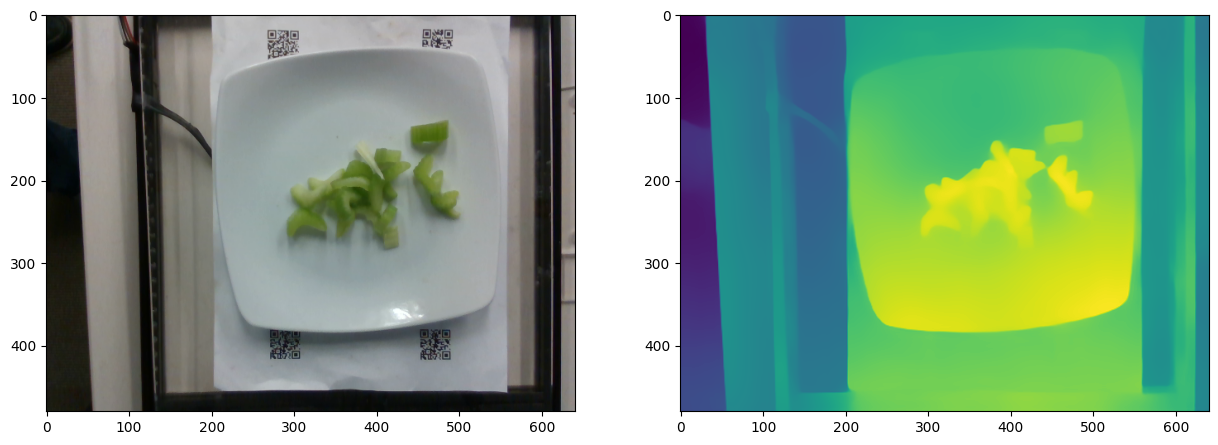

In [29]:
# load image and preprocess
img = cv2.imread(r"/datasets/data5/recipe_snap/RecipeSnap-a-lightweight-image-to-recipe-model-master/Nutrition5k data/realsense_overhead(RGB)/dish_1556575124/embedding_image/rgb.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    # imread legge in BGR, cioè in ordine di canali inverso rispetto a RGB

input_batch = transform(img).to(device)


# Predict and resize to original resolution
with torch.no_grad():
    prediction = midas_mid(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

output = prediction.cpu().numpy()

# print img and output together
fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(img)
ax[1].imshow(output)
plt.show()


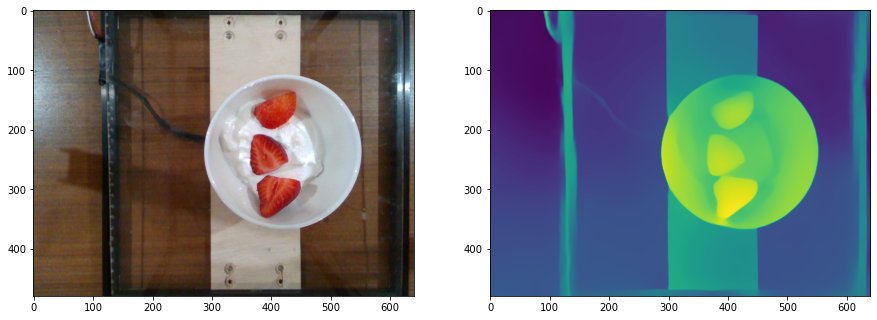

In [21]:
# load image and preprocess
img = cv2.imread(r"C:\Users\kevin\Desktop\dish_1560788349\embedding_image\rgb.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    # imread legge in BGR, cioè in ordine di canali inverso rispetto a RGB

input_batch = transform(img).to(device)


# Predict and resize to original resolution
with torch.no_grad():
    prediction = midas_large(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

output = prediction.cpu().numpy()

# print img and output together
fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(img)
ax[1].imshow(output)
plt.show()

### Small model (1 secondo di inferenza)

Using cache found in C:\Users\kevin/.cache\torch\hub\intel-isl_MiDaS_master


Loading weights:  None


Using cache found in C:\Users\kevin/.cache\torch\hub\rwightman_gen-efficientnet-pytorch_master


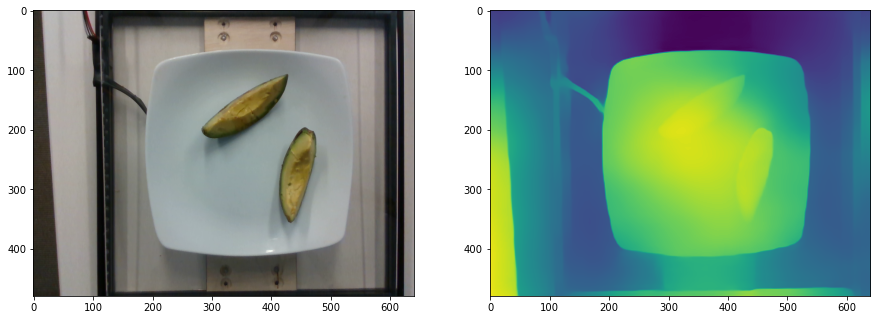

In [22]:
# load image and preprocess
img = cv2.imread(r"C:\Users\kevin\Desktop\dish_1558468401\embedding_image\rgb.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    # imread legge in BGR, cioè in ordine di canali inverso rispetto a RGB

input_batch = transform(img).to(device)


# Predict and resize to original resolution
with torch.no_grad():
    prediction = midas_small(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

output = prediction.cpu().numpy()

# print img and output together
fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(img)
ax[1].imshow(output)
plt.show()

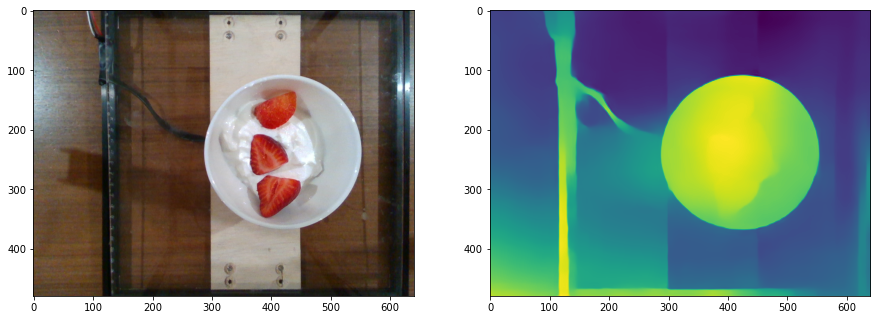

In [5]:
# load image and preprocess
img = cv2.imread(r"C:\Users\kevin\Desktop\dish_1560788349\embedding_image\rgb.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    # imread legge in BGR, cioè in ordine di canali inverso rispetto a RGB

input_batch = transform(img).to(device)


# Predict and resize to original resolution
with torch.no_grad():
    prediction = midas_small(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

output = prediction.cpu().numpy()

# print img and output together
fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(img)
ax[1].imshow(output)
plt.show()

### Mid model

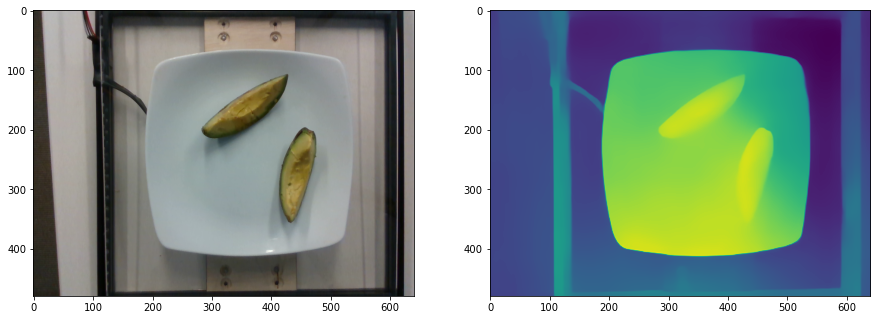

In [6]:
# load image and preprocess
img = cv2.imread(r"C:\Users\kevin\Desktop\dish_1558468401\embedding_image\rgb.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    # imread legge in BGR, cioè in ordine di canali inverso rispetto a RGB

input_batch = transform(img).to(device)


# Predict and resize to original resolution
with torch.no_grad():
    prediction = midas_mid(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

output = prediction.cpu().numpy()

# print img and output together
fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(img)
ax[1].imshow(output)
plt.show()

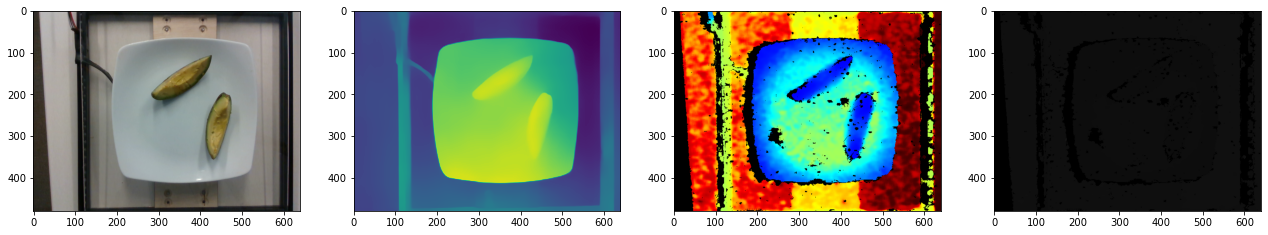

In [119]:
# load image and preprocess
img = cv2.imread(r"C:\Users\kevin\Desktop\dish_1558468401\embedding_image\rgb.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    # imread legge in BGR, cioè in ordine di canali inverso rispetto a RGB

# load image depth rgb ground truth and preprocess
depth_ground_truth = cv2.imread(r"C:\Users\kevin\Desktop\dish_1558468401\depth_color.png")
depth_ground_truth = cv2.cvtColor(depth_ground_truth, cv2.COLOR_BGR2RGB) 

# load image depth raw ground truth and preprocess
depth_raw_ground_truth = cv2.imread(r"C:\Users\kevin\Desktop\dish_1558468401\depth_raw.png")
depth_raw_ground_truth = cv2.cvtColor(depth_raw_ground_truth, cv2.COLOR_BGR2RGB) 

input_batch = transform(img).to(device)


# Predict and resize to original resolution
with torch.no_grad():
    prediction = midas_mid(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

output = prediction.cpu().numpy()

# print img and output together
fig, ax = plt.subplots(1, 4, figsize=(22, 22))
ax[0].imshow(img)
ax[1].imshow(output)
ax[2].imshow(depth_ground_truth)
ax[3].imshow(depth_raw_ground_truth)
plt.show()

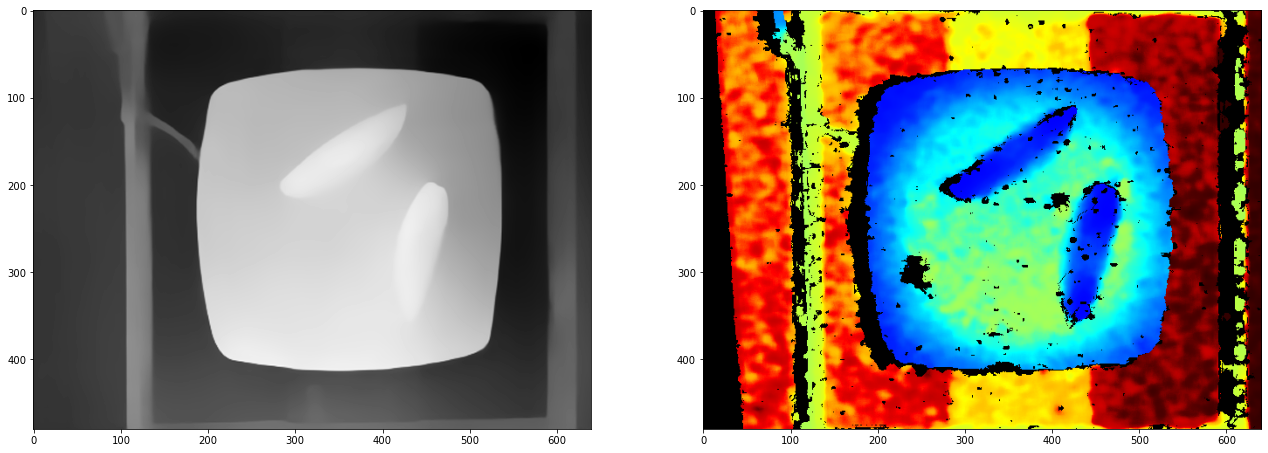

In [137]:
# print img and output together
fig, ax = plt.subplots(1, 2, figsize=(22, 22))
ax[0].imshow(output, cmap='gray')
ax[1].imshow(depth_ground_truth)
plt.show()

In [141]:
output.max()

1212.4427

# Confronto tra la segmentazione di SeeFood e la stima della profondità di Depth Raw
### prima devo runnare la parte di tensorflow per ottenere la segmentazione

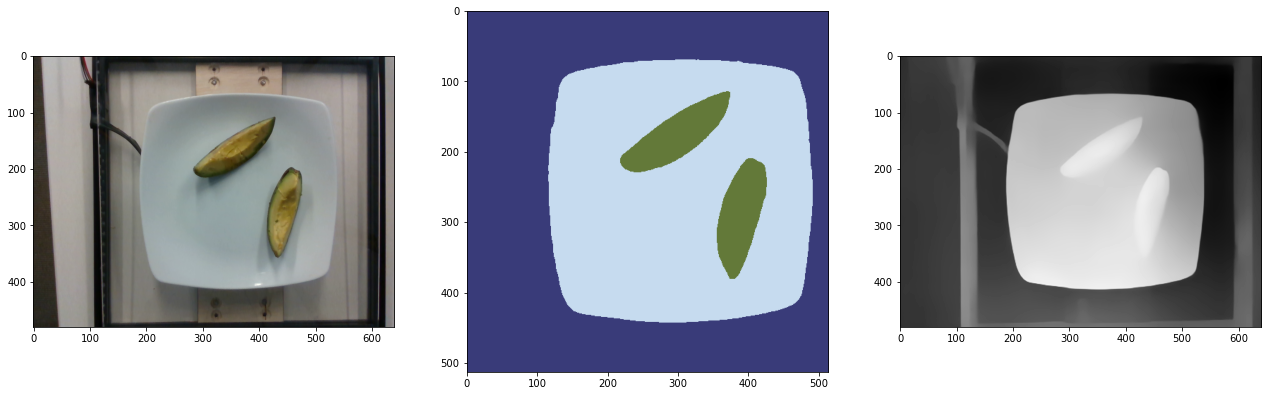

In [136]:
fig, ax = plt.subplots(1, 3, figsize=(22, 22))
ax[0].imshow(img)
ax[1].imshow(Image.fromarray(np.uint8(img_copy[0]*255)))  # background, piatto e vegetables
ax[2].imshow(output, cmap='gray')
plt.show()

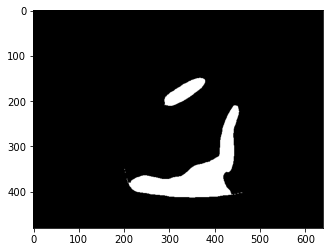

In [116]:
# augment contrast in image output
copy = np.full_like(output, fill_value=1)
for idx, row in enumerate(output/1212.4427):
    for idx2, pixel in enumerate(row):
        if pixel < 0.91:
            copy[idx][idx2] = 0
        else:
            copy[idx][idx2] = 1
plt.imshow(copy, cmap='gray')

## Immagine più complicata ...

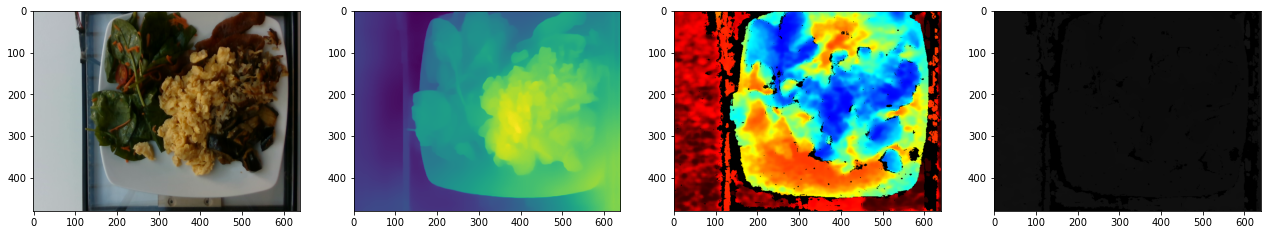

In [154]:
# load image and preprocess
img = cv2.imread(r"C:\Users\kevin\Desktop\dish_1566316612\rgb.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    # imread legge in BGR, cioè in ordine di canali inverso rispetto a RGB

# load image depth rgb ground truth and preprocess
depth_ground_truth = cv2.imread(r"C:\Users\kevin\Desktop\dish_1566316612\depth_color.png")
depth_ground_truth = cv2.cvtColor(depth_ground_truth, cv2.COLOR_BGR2RGB) 

# load image depth raw ground truth and preprocess
depth_raw_ground_truth = cv2.imread(r"C:\Users\kevin\Desktop\dish_1566316612\depth_raw.png")
depth_raw_ground_truth = cv2.cvtColor(depth_raw_ground_truth, cv2.COLOR_BGR2RGB) 

input_batch = transform(img).to(device)


# Predict and resize to original resolution
with torch.no_grad():
    prediction = midas_mid(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

output = prediction.cpu().numpy()

# print img and output together
fig, ax = plt.subplots(1, 4, figsize=(22, 22))
ax[0].imshow(img)
ax[1].imshow(output)
ax[2].imshow(depth_ground_truth)
ax[3].imshow(depth_raw_ground_truth)
plt.show()

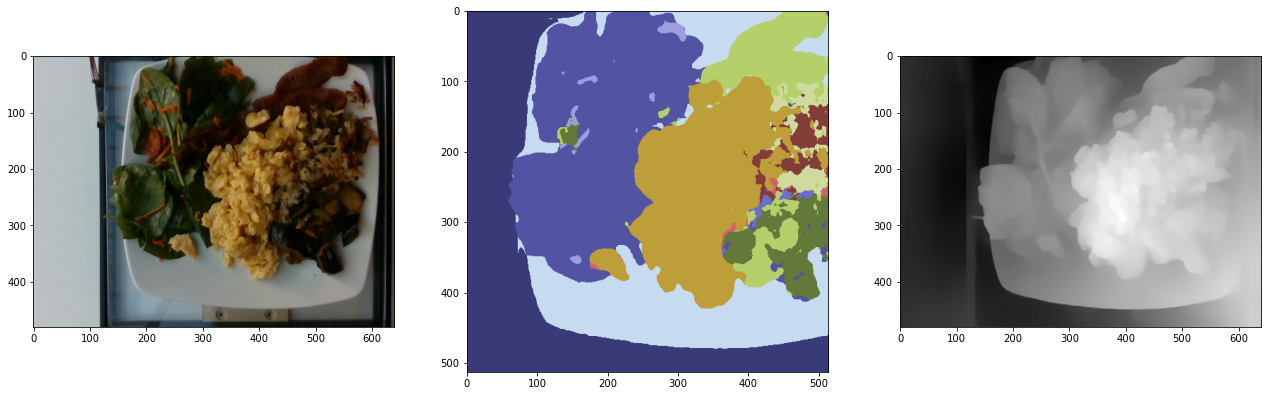

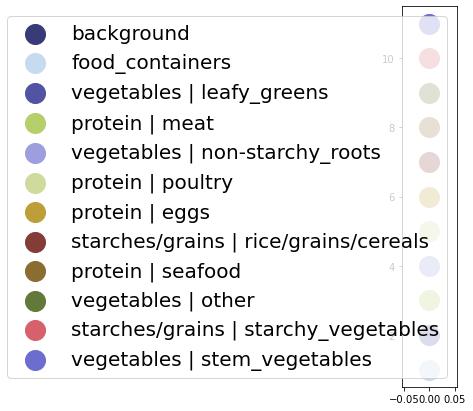

In [159]:
fig, ax = plt.subplots(1, 3, figsize=(22, 22))
ax[0].imshow(img)
ax[1].imshow(Image.fromarray(np.uint8(img_copy[0]*255)))  # background, piatto e vegetables
ax[2].imshow(output, cmap='gray')
plt.show()

# plot the legend
fig, ax_seefood = plt.subplots(figsize=(1, 7))
for idx, key in enumerate(dict_classes.keys()):
    color=labelmap['color_rgb'][labelmap['name'] == key].iloc[0]
    color_rgb_scaled = [el/255 for i, el in enumerate(color)]
    ax_seefood.scatter(0, idx, color = color_rgb_scaled, label=key)
ax_seefood.legend(loc='center', bbox_to_anchor=(1.5, 0.5), ncol=1)
ax_seefood.legend()
# adjust legend size
plt.rcParams['legend.fontsize'] = 20
# adjust legend point size
plt.rcParams['lines.markersize'] = 20
plt.show()

# Calorie Mama API

In [196]:
import requests

#curl -i -F media=@fruit.jpeg 

API_KEY = "9148dce7aa99fa8f03edac50bb192479"
API_URL = f"https://api-2445582032290.production.gw.apicast.io/v1/foodrecognition?user_key={API_KEY}"

# convert image from png to jpeg
img = Image.open(r"C:\Users\kevin\Desktop\dish_1566316612\rgb.png")
# resize image
img = img.resize((544, 544))
img.save(r"C:\Users\kevin\Desktop\dish_1566316612\rgb.jpeg")

files = {
    'media': open('C:/Users/kevin/Desktop/dish_1566316612/rgb.jpeg', 'rb'),
}

response = requests.post(API_URL, files=files)
print(response.json())

{'error': {'code': 400, 'errorDetail': 'Not photo attached'}}


In [113]:
open('C:/Users/kevin/Desktop/dish_1566316612/rgb.jpeg', 'rb')

<_io.BufferedReader name='C:/Users/kevin/Desktop/dish_1566316612/rgb.jpeg'>

In [186]:
# convert image from png to jpeg
img = Image.open(r"C:\Users\kevin\Desktop\dish_1566316612\rgb.png")
# resize image
img = img.resize((544, 544))
img.save(r"C:\Users\kevin\Desktop\dish_1566316612\rgb.jpeg")
img = Image.open(r"C:\Users\kevin\Desktop\dish_1566316612\rgb.jpeg")


# Kcal estimation from Recipe1M

In [1]:
from recipe_snap import * 
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import shutil

In [2]:
# Update with your paths and model names, the following are default values
image_dir = r'../images'
checkpoint_dir = r"../checkpoints/model"
recipe_emb_path = r"../data/recipe_embeddings/recipe_embeddings_feats_test.pkl" 
recipe_dict_path = r"../data/recipe_dict/test.pkl"

In [3]:
rs = RecipeSnap(checkpoint_dir=checkpoint_dir)
#rs.load_image_encoder()
rs.load_recipe_lib(recipe_emb_path = recipe_emb_path, recipe_dict_path = recipe_dict_path)

c:\Users\kevin\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\kevin\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


recipe_embs [[ 0.97239685  0.9999553  -0.9997202  ...  0.98708016 -0.6975954
  -0.6635583 ]
 [-0.71901464  0.06093328 -0.6305163  ...  0.3851063   0.01549883
  -0.49568406]]
recipe_ids ['fffe7168df', 'ffff89d1ae']
Succeed to load recipe embedding from ... ../data/recipe_embeddings/recipe_embeddings_feats_test.pkl
Recipe embedding (that is a list of vectors) shape: (102741, 1024)
Recipe ids (that is a list) length: 102741

-------------------------------------------------------
Length of recipe dictionary of dish with images: 51304

-------------------------------------------------------
Succeed to load recipe library from ... ../data/recipe_dict/test.pkl
Recipe library size with dish without images 154045 recipe library contents: 
('ffff89d1ae', {'ingredients': ['7 1/2 cups sugar', '3/4 cup lard', '9 eggs', '3 (8 ounce) cans evaporated milk', '3 (8 ounce) cans water', '1/8 cups flour', '1/8 teaspoons baking powder', '7 1/2 teaspoons salt', '9 teaspoons nutmeg'], 'title': 'salvation arm

In [4]:
# osservo il mio recipe dict, da 0 a k
rs.get_recipe(1)

[('00003a70b1',
  {'ingredients': ['2 1/2 cups milk',
    '1 1/2 cups water',
    '1/4 cup butter',
    'mashed potatoes, 1 box, homestyle',
    '1 (8 ounce) can whole kernel corn (drained)',
    '1 cup cheddar cheese',
    '1 cup french-fried onions'],
   'title': 'crunchy onion potato bake',
   'instructions': ['preheat oven to 350 degrees fahrenheit.',
    'spray pan with non stick cooking spray.',
    'heat milk, water and butter to boiling; stir in contents of both pouches of potatoes; let stand one minute.',
    'stir in corn.',
    'spoon half the potato mixture in pan.',
    'sprinkle half each of cheese and onions; top with remaining potatoes.',
    'sprinkle with remaining cheese and onions.',
    'bake 10 to 15 minutes until cheese is melted.',
    'enjoy !'],
   'images': ['3e233001e2.jpg', '7f749987f9.jpg', 'aaf6b2dcd3.jpg']})]

In [5]:
# return true if the recipe is in the recipe library (dalla lista recipe ids)
rs.get_recipe_ids("fffe7168df")

True

In [ ]:
# To convert cups to grams, multiply your cups figure by 236.588 and again by the ingredient density (in g/ml). 
# If your density is not in g/ml, you will need to convert your density figure first.

In [6]:
# read json data 
import json
  
# Opening JSON file
f = open(r'C:\Users\kevin\Desktop\Università\Data Science\Stage\RecipeSnap-a-lightweight-image-to-recipe-model-master\RecipeSnap-a-lightweight-image-to-recipe-model-master\Recipe1M\recipes_with_nutritional_info.json')

# returns JSON object as 
# a dictionary
data = json.load(f)
  
# Closing file
f.close()

In [8]:
# len(data) == 51235
data[0:1]

[{'fsa_lights_per100g': {'fat': 'green',
   'salt': 'green',
   'saturates': 'green',
   'sugars': 'orange'},
  'id': '000095fc1d',
  'ingredients': [{'text': 'yogurt, greek, plain, nonfat'},
   {'text': 'strawberries, raw'},
   {'text': 'cereals ready-to-eat, granola, homemade'}],
  'instructions': [{'text': 'Layer all ingredients in a serving dish.'}],
  'nutr_per_ingredient': [{'fat': 0.8845044000000001,
    'nrg': 133.80964,
    'pro': 23.110512399999998,
    'sat': 0.26535132,
    'sod': 81.64656,
    'sug': 7.348190400000001},
   {'fat': 0.46,
    'nrg': 49.0,
    'pro': 1.02,
    'sat': 0.023,
    'sod': 2.0,
    'sug': 7.43},
   {'fat': 7.415,
    'nrg': 149.25,
    'pro': 4.17,
    'sat': 1.207,
    'sod': 8.0,
    'sug': 6.04}],
  'nutr_values_per100g': {'energy': 81.12946131894766,
   'fat': 2.140139263515891,
   'protein': 6.914436593565536,
   'salt': 0.05597816738985967,
   'saturates': 0.36534716195613937,
   'sugars': 5.08634103436144},
  'partition': 'train',
  'quanti